In [1]:
# import required libraries and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns


In [2]:
# value weighted index: the weight of each constituent is proportional to its market cap, similar to s&p500
# so larger companies (greater market cap) stock price changes have bigger impact on the portfolio value.

listings = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\data used for python\\sp500 for portfolio.xlsx", 
                    ).dropna()
listings.head()


,company,name,industry,ticker,price,outstanding,market_cap,PtoE
0,APA CORPORATION (XNAS:APA),APA CORPORATION,Oil & Gas,APA,21.90,377972800,8277604319,1188.41
1,"EOG RESOURCES, INC. (XNYS:EOG)","EOG RESOURCES, INC.",Oil & Gas,EOG,85.70,583605100,50014957070,859.99
2,"SERVICENOW, INC. (XNYS:NOW)","SERVICENOW, INC.",Software & IT Services,NOW,550.20,197448000,108636000000,724.06
3,HANESBRANDS INC. (XNYS:HBI),HANESBRANDS INC.,Textiles & Apparel,HBI,18.47,349115400,6448161438,636.24
4,"TESLA, INC. (XNAS:TSLA)","TESLA, INC.",Automobiles & Auto Parts,TSLA,656.57,963330400,632494000000,628.53


In [3]:
# Move 'ticker' into the index
listings.set_index('ticker', inplace= True)

# Drop rows with missing 'industry' data
listings.dropna(subset=['industry'], inplace = True)


# Show the number of companies per industry
print(listings.groupby('industry').size().sort_values(ascending=False))

industry
Software & IT Services                             42
Healthcare Equipment & Supplies                    30
Residential & Commercial REIT                      28
Machinery, Equipment & Components                  27
Banking Services                                   22
Insurance                                          22
Electrical Utilities & IPPs                        19
Semiconductors & Semiconductor Equipment           19
Hotels & Entertainment Services                    19
Food & Tobacco                                     18
Investment Banking & Investment Services           17
Professional & Commercial Services                 16
Oil & Gas                                          15
Pharmaceuticals                                    14
Specialty Retailers                                14
Chemicals                                          14
Media & Publishing                                 13
Healthcare Providers & Services                    11
Freight & Logistics

In [4]:
# Select those largest companies whose p/e is greater than 70
boolean_pe = (listings['PtoE'] > 70)
listings_pe_50 = listings[boolean_pe]

# Select largest company for each industry
components = listings_pe_50.groupby(['industry'])['market_cap'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('ticker')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['name', 'market_cap', 'price', 'PtoE']
print(listings.loc[tickers, info_cols].sort_values('market_cap', ascending=False))

industry                                  ticker
Automobiles & Auto Parts                  TSLA      632494000000
Semiconductors & Semiconductor Equipment  NVDA      474907000000
Hotels & Entertainment Services           SBUX      131451000000
Personal & Household Products & Services  EL        108938000000
Software & IT Services                    NOW       108636000000
Healthcare Equipment & Supplies           ISRG      107213000000
Residential & Commercial REIT             CCI        84713483496
Biotechnology & Medical Research          GILD       83590963700
Professional & Commercial Services        FISV       71591030478
Oil & Gas                                 EOG        50014957070
Food & Tobacco                            KHC        49598630000
Food & Drug Retailing                     WBA        45017660352
Aerospace & Defense                       TDG        37471021528
Textiles & Apparel                        VFC        32126125656
Renewable Energy                         

In [5]:
# lets download historic stock prices off all the companies
stock_prices = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\data used for python\\sp500components.xlsx", 
                    parse_dates=['Date'], index_col='Date')


In [6]:
# lets extract only those tickers that we are interested in from all these 500 companies:
our_desired_companies = stock_prices[tickers]
our_desired_companies.tail()

,TDG,TSLA,GILD,WBA,KHC,ISRG,SBUX,IR,NLSN,EOG,EL,FISV,ENPH,CCI,NVDA,NOW,VFC
Date,,,,,,,,,,,,,,,,,
2020-08-31,499.67,498.32,66.75,38.02,35.04,730.84,84.47,35.06,15.28,45.34,221.72,99.58,77.23,163.25,534.98,482.02,65.75
2020-09-30,475.12,429.01,63.19,35.92,29.95,709.54,85.92,35.60,14.18,35.94,218.25,103.05,82.59,166.50,541.22,485.00,70.25
2020-10-30,477.41,388.04,58.15,34.04,30.59,667.08,86.96,34.94,13.51,34.24,219.66,95.47,98.09,156.20,501.36,497.57,67.20
2020-11-30,579.19,567.60,60.67,38.01,32.94,726.05,98.02,44.27,16.17,46.88,245.32,115.18,136.57,167.57,536.06,534.55,83.40
2020-12-31,618.85,705.67,58.26,39.88,34.66,818.10,106.98,45.56,20.87,49.87,266.19,113.86,175.47,159.19,522.20,550.43,85.41


In [7]:
# lets caculate the reurn of each companies by Calculate the price return for the index components
# by dividing the last row of stock_prices by the first, subtracting 1 and multiplying by 100.
# Assign the result to price_return.
# Calculate the returns
price_return = our_desired_companies.iloc[-1,:].div(our_desired_companies.iloc[0,:]).sub(1)
price_return

TDG      0.582737
TSLA    10.492248
GILD    -0.167833
WBA     -0.448104
KHC     -0.278818
ISRG     0.562333
SBUX     0.570003
IR       0.846777
NLSN    -0.187305
EOG     -0.497278
EL       0.951253
FISV     0.372965
ENPH    23.269710
CCI      0.359901
NVDA     2.632696
NOW      1.501727
VFC      0.078072
dtype: float64

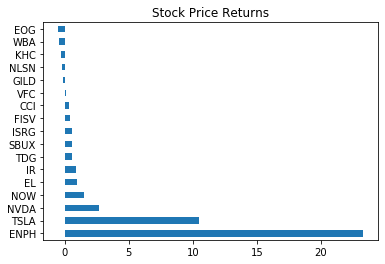

In [8]:
# Plot horizontal bar chart of sorted price_return   
price_return.sort_values(ascending=False).plot(kind = 'barh', title = 'Stock Price Returns')
plt.show()

In [9]:
# now lets build a portfolio based on market cap weighted index
# so far we have selected the comapanies to include in our index

In [10]:
info_cols = ['market_cap', 'price', 'outstanding']
components = listings.loc[tickers, info_cols].sort_values('market_cap', ascending=False)
# divide market cap and outstanding by 1,000,000 to make these bug numbers more readable
components['market_cap'] = round(components['market_cap']/1000000)
components['outstanding'] = round(components['outstanding']/1000000)

components.sort_values(by=['outstanding'])

,market_cap,price,outstanding
ticker,,,
TDG,37471.0,682.63,55.0
ISRG,107213.0,905.42,118.0
ENPH,23101.0,170.24,136.0
NOW,108636.0,550.20,197.0
NLSN,8869.0,24.74,358.0
EL,108938.0,302.55,363.0
VFC,32126.0,81.88,392.0
IR,19635.0,46.81,419.0
CCI,84713.0,196.01,432.0


In [11]:
# now we assume that we use the above outstanding, (number of shares), to build our portfolio
# Select the number of shares
no_shares = components['outstanding']
no_shares.sort_values()


ticker
TDG       55.0
ISRG     118.0
ENPH     136.0
NOW      197.0
NLSN     358.0
EL       363.0
VFC      392.0
IR       419.0
CCI      432.0
EOG      584.0
NVDA     623.0
FISV     667.0
WBA      864.0
TSLA     963.0
SBUX    1178.0
KHC     1223.0
GILD    1254.0
Name: outstanding, dtype: float64

In [12]:
# Create the series of market cap per ticker
market_cap = our_desired_companies.mul(no_shares)
market_cap

,CCI,EL,ENPH,EOG,FISV,GILD,IR,ISRG,KHC,NLSN,NOW,NVDA,SBUX,TDG,TSLA,VFC,WBA
Date,,,,,,,,,,,,,,,,,
2019-01-31,50569.92,49520.46,983.28,57932.80,55314.31,87792.54,10336.73,61789.52,58777.380,9193.44,43343.94,89556.25,80268.92,21505.00,59132.052,31056.1216,62432.64
2019-02-28,51300.00,56969.22,1233.52,54896.00,56488.23,81535.08,11250.15,64617.98,40591.370,9379.60,47169.68,96103.98,82766.28,23874.95,61608.888,32233.1408,61508.16
2019-03-29,55296.00,60094.65,1255.28,55585.12,58882.76,81522.54,11652.39,67328.44,39930.950,8473.86,48558.53,111865.88,87572.52,24969.45,53901.036,32067.0896,54665.28
2019-04-30,54336.96,62367.03,1365.44,56093.20,58189.08,81560.16,14141.25,60254.34,40652.520,9139.74,53487.47,112763.00,91507.04,26538.60,45971.694,34834.3352,46284.48
2019-05-31,56164.32,58453.89,2063.12,47817.92,57268.62,78061.50,14233.43,54852.30,33815.950,8137.34,51600.21,84391.58,89598.68,24252.25,35661.816,32096.9600,42629.76
2019-06-28,56311.20,66468.93,2479.28,54405.44,60803.72,84720.24,14497.40,61896.90,37961.920,8090.80,54090.29,102315.29,98751.74,26609.00,43038.396,34241.2000,47234.88
2019-07-31,57568.32,66860.97,3828.40,50136.40,70321.81,82162.08,13814.43,61302.18,39148.230,8291.28,54645.83,105112.56,111544.82,26699.20,46534.086,34256.8800,47079.36
2019-08-30,62713.44,71870.37,4035.12,43326.96,71328.98,79679.16,12016.92,60338.12,31210.960,7432.08,51582.48,104358.73,113747.68,29607.60,43452.486,32124.4000,44228.16
2019-09-30,60052.32,72218.85,3023.28,43344.48,69094.53,79478.52,11853.51,63711.74,34164.505,7607.50,50008.45,108445.61,104158.76,28636.85,46391.562,34884.0800,47787.84


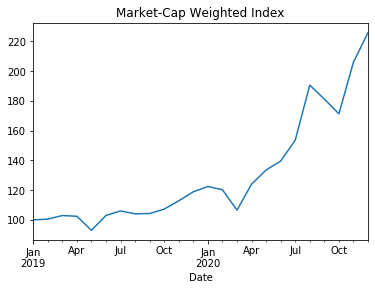

In [13]:
# Aggregate and print the market cap per trading day
raw_index = market_cap.sum(axis=1)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

In [14]:
# Calculate the contribution of each stock to the index

index

Date
2019-01-31    100.000000
2019-02-28    100.484738
2019-03-29    102.907332
2019-04-30    102.408789
2019-05-31     92.958977
2019-06-28    102.942877
2019-07-31    106.003763
2019-08-30    104.044379
2019-09-30    104.262430
2019-10-31    107.228515
2019-11-29    112.807631
2019-12-31    118.903001
2020-01-31    122.442289
2020-02-28    120.265720
2020-03-31    106.527423
2020-04-30    123.977869
2020-05-29    133.548945
2020-06-30    139.570806
2020-07-31    153.549625
2020-08-31    190.608957
2020-09-30    181.249703
2020-10-30    171.337530
2020-11-30    206.065297
2020-12-31    225.941357
dtype: float64

In [15]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0]-1)*(100)
print(index_return)



125.94135707946785


In [16]:

# Select the market capitalization
market_cap = components['market_cap']

# Calculate the total market cap
total_market_cap = market_cap.sum()
total_market_cap

2069368.0

In [17]:
# Calculate the component weights, and print the result
weights = (market_cap.div(total_market_cap))
print(weights.sort_values(ascending = True))

ticker
NLSN    0.004286
IR      0.009488
ENPH    0.011163
VFC     0.015525
TDG     0.018107
WBA     0.021754
KHC     0.023968
EOG     0.024169
FISV    0.034596
GILD    0.040394
CCI     0.040937
ISRG    0.051810
NOW     0.052497
EL      0.052643
SBUX    0.063522
NVDA    0.229494
TSLA    0.305646
Name: market_cap, dtype: float64


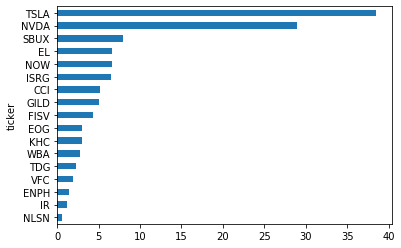

In [18]:
# Calculate and plot the contribution by component
weights.mul(index_return).sort_values(ascending = True).plot(kind = 'barh')
plt.show()

In [19]:
# Convert index series to dataframe here
Data = index.to_frame('Index')
Data

,Index
Date,
2019-01-31,100.000000
2019-02-28,100.484738
2019-03-29,102.907332
2019-04-30,102.408789
2019-05-31,92.958977
2019-06-28,102.942877
2019-07-31,106.003763
2019-08-30,104.044379
2019-09-30,104.262430


In [20]:

# Normalize djia series and add as new column to data
sp500_prices = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\data used for python\\sp500 index price.xlsx",
                             parse_dates=['Date'], index_col='Date')
sp500_prices.head()

,Close
Date,
2020-12-31,3756.07
2020-12-30,3732.04
2020-12-29,3727.04
2020-12-28,3735.36
2020-12-24,3703.06


In [21]:
sp500_prices.sort_index(inplace = True, ascending= True)
sp500_prices

,Close
Date,
2019-01-31,2704.10
2019-02-01,2706.53
2019-02-04,2724.87
2019-02-05,2737.70
2019-02-06,2731.61
...,...
2020-12-24,3703.06
2020-12-28,3735.36
2020-12-29,3727.04


In [22]:
sp500_prices_normalized = sp500_prices.div(sp500_prices.iloc[0]).mul(100)
sp500_prices_normalized

,Close
Date,
2019-01-31,100.000000
2019-02-01,100.089864
2019-02-04,100.768093
2019-02-05,101.242558
2019-02-06,101.017344
...,...
2020-12-24,136.942421
2020-12-28,138.136903
2020-12-29,137.829222


Index    125.941357
sp500     38.902777
dtype: float64


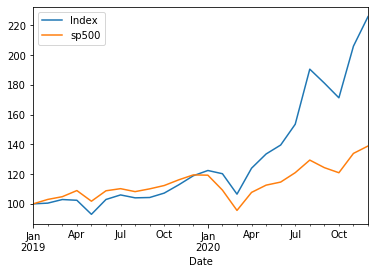

In [23]:
Data['sp500'] = sp500_prices_normalized
# Show total return for both index and sp500
print(Data.iloc[-1].div(Data.iloc[0]).sub(1).mul(100))

# Plot both series
Data.plot()
plt.show()

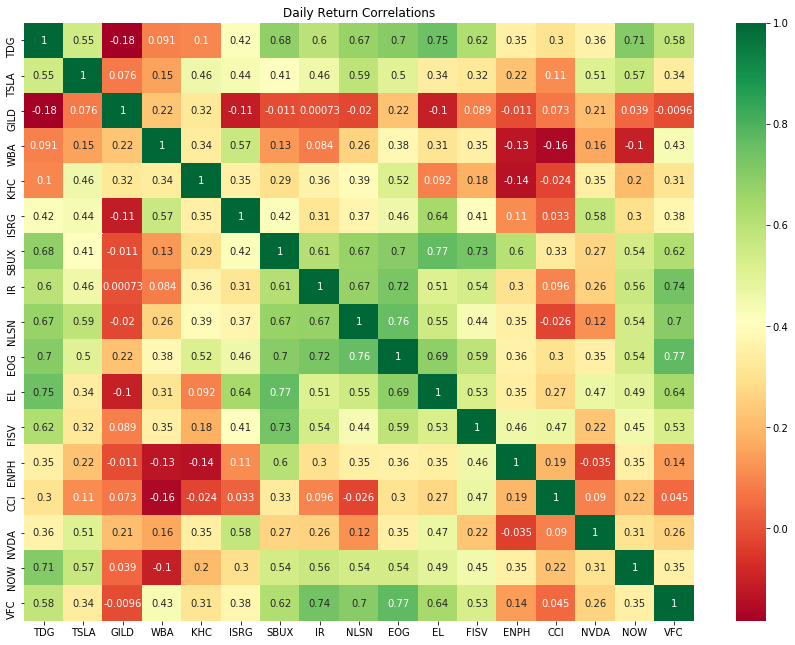

In [24]:
# Calculate the daily returns
returns = our_desired_companies.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()


# Plot a heatmap of daily return correlations
plt.subplots(figsize=(15,11))

sns.heatmap(correlations, annot = True, cmap = 'RdYlGn')
plt.title('Daily Return Correlations')

plt.show()

In [25]:
# storing results in an excel sheet
stock_prices

,LYB,AXP,VZ,AVGO,BA,CAT,JPM,CVX,KO,ABBV,...,ALGN,ILMN,LKQ,NLSN,GRMN,ZTS,EQIX,DLR,LVS,DISCK
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,86.97,102.70,55.06,268.25,385.62,133.16,103.50,114.65,48.13,80.29,...,248.95,279.79,26.220,25.68,69.18,86.16,394.00,108.34,58.36,26.65
2019-02-28,85.52,107.74,56.92,275.36,439.96,137.34,104.36,119.58,45.34,79.24,...,258.97,312.77,27.700,26.20,83.97,94.23,423.50,113.12,61.43,27.25
2019-03-29,84.08,109.30,59.13,300.71,381.42,135.49,101.23,123.18,46.86,80.59,...,284.33,310.69,28.380,23.67,86.35,100.67,453.16,119.00,60.96,25.42
2019-04-30,88.23,117.23,57.19,318.40,377.69,139.42,116.05,120.06,49.06,79.39,...,324.68,312.00,30.100,25.53,85.74,101.84,454.70,117.71,67.05,28.76
2019-05-31,74.25,114.71,54.35,251.64,341.61,119.81,105.96,113.85,49.13,76.71,...,284.35,306.91,25.650,22.73,76.48,101.05,485.79,117.72,55.00,25.64
2019-06-28,86.13,123.44,57.13,287.86,364.01,136.29,111.80,124.44,50.92,72.72,...,273.70,368.15,26.610,22.60,79.80,113.49,504.29,117.79,59.09,28.45
2019-07-31,83.69,124.37,55.27,289.99,341.18,131.67,116.00,123.11,52.63,66.62,...,209.08,299.38,26.930,23.16,78.59,114.89,502.10,114.36,60.44,28.24
2019-08-30,77.38,120.37,58.16,282.64,364.09,119.00,109.86,117.72,55.04,65.74,...,183.11,281.34,26.270,20.76,81.57,126.42,556.28,123.63,55.47,26.03
2019-09-30,89.47,118.28,60.36,276.07,380.47,126.31,117.69,118.60,54.44,75.72,...,180.92,304.22,31.450,21.25,84.69,124.59,576.80,129.81,57.76,24.62


In [26]:
index = pd.DataFrame(index)

In [31]:
# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel

# first define where you want your file to be stored. 
out_path = "F:\\schulich\\datacamp\\python finance fundamentals\\data used for python\\exported_data_as_excel.xlsx"

# define multiple sheets in each of your excel file. (for only one worksheet we do not need to use 'with')
with pd.ExcelWriter(out_path) as writer:
    data.to_excel(excel_writer = writer, sheet_name = 'data')
    returns.to_excel(excel_writer = writer, sheet_name = 'returns', )
# if you look at the above path, you can see that the file has been created. 